In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

db_user = "root"
db_password = "12341234"
db_host = "localhost"
db_port = "3306"
db_name = "miniproject2"

engine = create_engine(f"mysql+pymysql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")

df = pd.read_sql("SELECT * FROM ml_base_view", engine)
df = df.dropna(subset=["population_diff", "car_diff"])
df.head()


,district,datetime,population,population_diff,car_count,car_diff
0,전체,2021-04-01,9819851.0,-8243.0,3159075.0,365.0
1,전체,2021-05-01,9806728.0,-13123.0,3160629.0,1554.0
2,전체,2021-06-01,9795426.0,-11302.0,3162985.0,2356.0
3,전체,2021-07-01,9785265.0,-10161.0,3171767.0,8782.0
4,전체,2021-08-01,9774371.0,-10894.0,3171749.0,-18.0


In [7]:
df=df[df['district']=='동대문구']

In [8]:

df["car_increase"] = (df["car_diff"] > 0).astype(int)

In [9]:
df.head()

,district,datetime,population,population_diff,car_count,car_diff,car_increase
528,동대문구,2021-04-01,352591.0,21.0,98224.0,54.0,1
529,동대문구,2021-05-01,352498.0,-93.0,98138.0,-86.0,0
530,동대문구,2021-06-01,352259.0,-239.0,98211.0,73.0,1
531,동대문구,2021-07-01,351737.0,-522.0,98359.0,148.0,1
532,동대문구,2021-08-01,351469.0,-268.0,98390.0,31.0,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 528 to 575
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   district         48 non-null     object 
 1   datetime         48 non-null     object 
 2   population       48 non-null     float64
 3   population_diff  48 non-null     float64
 4   car_count        48 non-null     float64
 5   car_diff         48 non-null     float64
 6   car_increase     48 non-null     int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 3.0+ KB


In [11]:
df.describe()

,population,population_diff,car_count,car_diff,car_increase
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,355848.770833,195.416667,100528.270833,111.083333,0.770833
std,3449.868053,634.135291,1939.382867,185.330738,0.424744
min,351469.000000,-1099.000000,98138.000000,-278.000000,0.000000
25%,352591.750000,-220.250000,98573.250000,6.250000,1.000000
50%,355064.000000,123.500000,100025.000000,60.000000,1.000000
75%,359498.750000,491.500000,102650.250000,162.250000,1.000000
max,361950.000000,2004.000000,103502.000000,619.000000,1.000000


In [45]:
X = df[["population_diff"]]
y = df["car_increase"]


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [47]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)


LogisticRegression()

In [48]:
from sklearn.metrics import accuracy_score

y_pred = log_model.predict(X_test)
accuracy_score(y_test, y_pred)


0.7

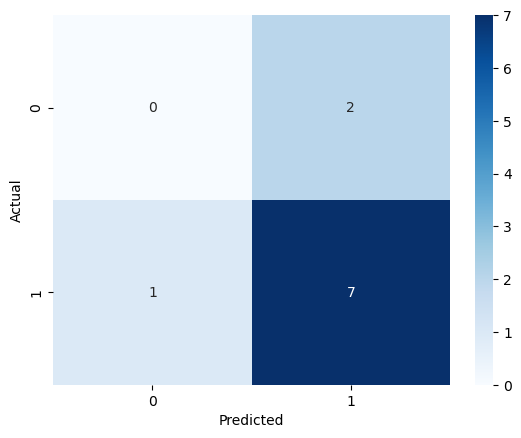

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [50]:
coef = log_model.coef_[0][0]
coef


np.float64(0.0025961568042035745)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


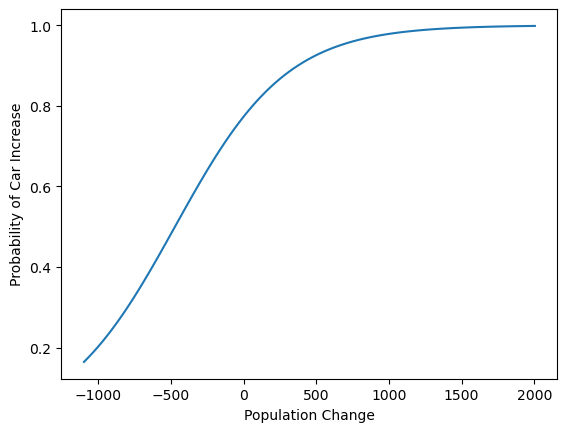

In [51]:
import numpy as np

pop_range = np.linspace(
    df["population_diff"].min(),
    df["population_diff"].max(),
    100
).reshape(-1, 1)

prob = log_model.predict_proba(pop_range)[:, 1]

plt.plot(pop_range, prob)
plt.xlabel("Population Change")
plt.ylabel("Probability of Car Increase")
plt.show()
